# Notes
* To deploy an image classifier (Bears) into production : anyone can upload and play around with this model

# Libraries

In [1]:
%pip install -Uqq fastai
%pip install -Uqq fastai duckduckgo_search

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [469 lines of output]
      Ignoring numpy: markers 'python_version < "3.9"' don't match your environment
        Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'done'
        Using cached murmurhash-1.0.11-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.0 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished wit

In [2]:
from duckduckgo_search import DDGS
from fastai import *
from fastcore.all import *
from fastdownload import download_url

from fastai.vision.all import *
# from fastai.vision.widgets import * 


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'duckduckgo_search'

In [3]:
def search_images(keyword, max_images=30):
    print(f'searching for {keyword}')
    
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=keyword)
        image_urls = [result.get('image') for result in search_results[:max_images]]
        
        # convert to L (functionality extend list class from fastai)
        return L(image_urls)
    

In [21]:
results = search_images('grizzly bear',max_images=10)
imgs = results[0]
imgs

searching for grizzly bear


'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

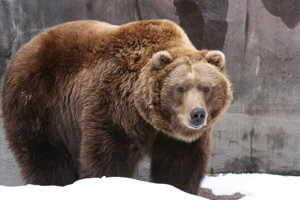

In [5]:
img_download = download_url(imgs, dest='grizzly_bear.jpg', show_progress=True)
imgs = Image.open(img_download)
imgs.to_thumb(300,300)

# Images download

In [17]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()

In [18]:


for b_type in bear_types:
    dest = path/b_type
    dest.mkdir(exist_ok=True)#,parents=True)
    results = search_images(keyword=f'{b_type} bear')
    download_images(dest, urls=results)#, show_progress=True)
    
    resize_images(path/b_type, max_size=400, dest=path/b_type)

searching for grizzly bear


C:\Users\INDHRNA\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py:80: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


searching for black bear
searching for teddy bear


In [8]:
results[0]

'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

In [26]:
all_imgs = get_image_files(path)
failed_imgs = verify_images(all_imgs)
failed_imgs.map(Path.unlink)

(#4) [None,None,None,None]

# Data block

In [27]:
dls = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.25, seed=143),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)
dls = dls.dataloaders(path)


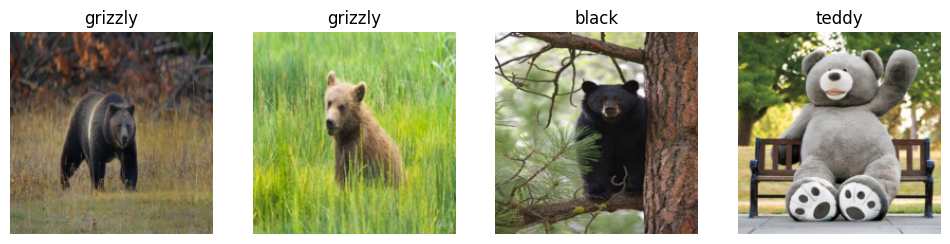

In [31]:
dls.valid.show_batch(max_n=4, nrows=1)

In [28]:
mdl_learn = vision_learner(dls, resnet34, metrics=error_rate)


In [29]:
mdl_learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,nan,5.063987,0.666667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,nan,5.063987,0.666667,00:00
1,nan,5.063987,0.666667,00:00
2,nan,5.063987,0.666667,00:00
